In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from math import log10
from sympy.solvers import solve
from sympy import Symbol


Data = pd.read_csv('Dados-medicos.csv',delim_whitespace=True, usecols =[0,1,2,3], header=0)
Data.columns= ['Idade', "Peso", "Carga Final", "VO2 maximo"]
Color = ["Blue","Green", "Red", "Purple"]

In [ ]:
k = Symbol('k')
weibull_k = solve((np.sum((Data["Idade"]**k)*np.log(Data["Idade"]))/np.sum(Data["Idade"]**k))-(1/k)-((1/Data["Idade"].count())*np.sum(np.log(Data["Idade"]))),k)
print(weibull_k)

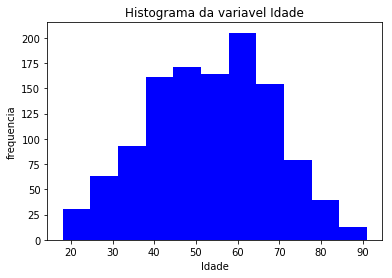

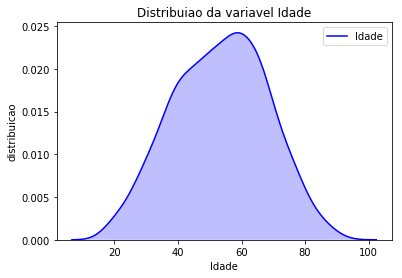

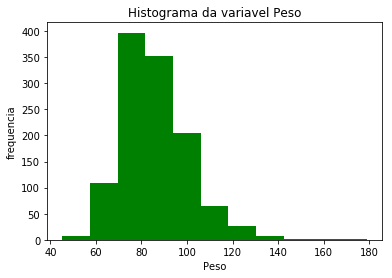

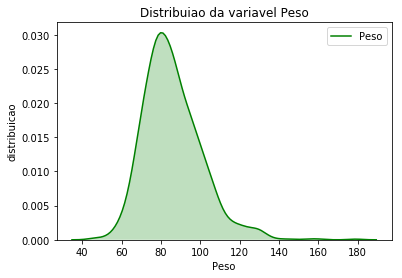

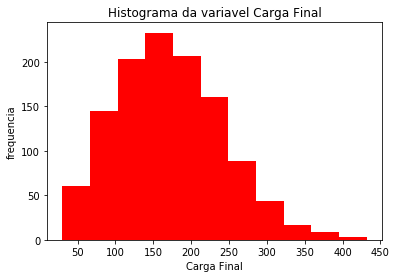

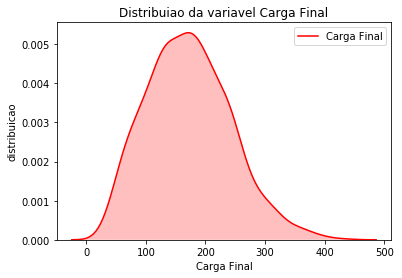

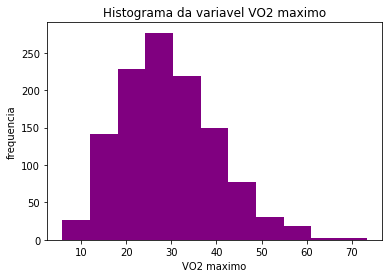

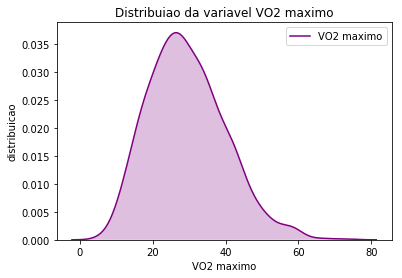

In [85]:
for i in range (0,4):
    x = Data.columns[i]
    count = Data[x].count()
    bin= 1+ 3.3* log10(count)
    plt.hist(Data[x],int(bin),color=Color[i])
    plt.title('Histograma da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('frequencia')
    plt.savefig('Histograma da variavel '+x)
    plt.show()
    sns.kdeplot(Data[x],color=Color[i], shade=True)
    plt.title('Distribuicao da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicao da variavel '+x)
    plt.show()
    print("\n\n")
    
    


Variavel:  Idade
Media:  53.29095563139932
Desvio Padrao:  14.746296966880656
Variancia:  217.45327423543367
Quantidade:  1172 



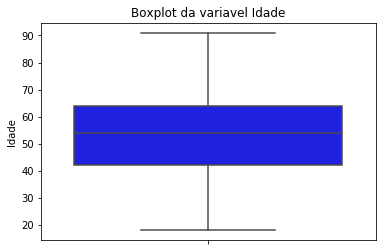




Variavel:  Peso
Media:  85.92577645051195
Desvio Padrao:  14.799113384059629
Variancia:  219.0137569542528
Quantidade:  1172 



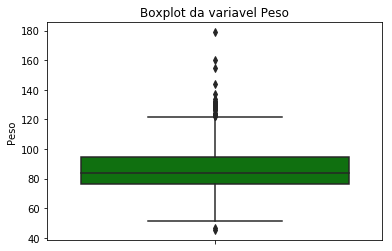




Variavel:  Carga Final
Media:  172.27150170648466
Desvio Padrao:  70.093123662472
Variancia:  4913.0459847625925
Quantidade:  1172 



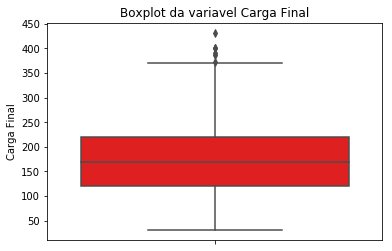




Variavel:  VO2 maximo
Media:  29.39472792315316
Desvio Padrao:  10.49724989342601
Variancia:  110.1922553250324
Quantidade:  1172 



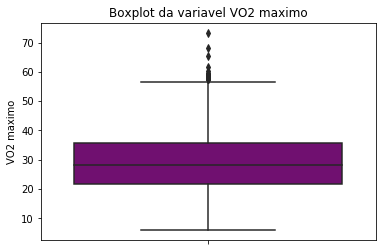

In [53]:
for i in range (0,4):
    x = Data.columns[i]
    print ("Variavel: ",x)
    print ("Media: ", Data[x].mean())
    print ("Desvio Padrao: ", Data[x].std())
    print ("Variancia: ", Data[x].var())
    print ("Quantidade: " , Data[x].count(), "\n")
    sns.boxplot(y=x,data=Data,color=Color[i])
    plt.title('Boxplot da variavel '+x)
    plt.savefig('Boxplot da variavel '+x)
    plt.show()
    print("\n\n")

Idade 

Lambda da exponencial:  0.018764910258257682 

Mu da gaussiana:  53.29095563139932
Sigma ao quadrado da gaussiana:  217.45327423543367 

Mu da lognormal:  3.932509819486875
Sigma ao quadrado da lognormal:  14.916726082683745 



C:\Users\jutogashi\Anaconda2\envs\p37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jutogashi\Anaconda2\envs\p37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\jutogashi\Anaconda2\envs\p37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


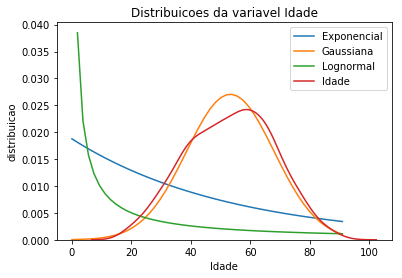




Peso 

Lambda da exponencial:  0.011637951279683105 

Mu da gaussiana:  85.92577645051195
Sigma ao quadrado da gaussiana:  219.0137569542528 

Mu da lognormal:  4.439451920143028
Sigma ao quadrado da lognormal:  19.257468823956994 



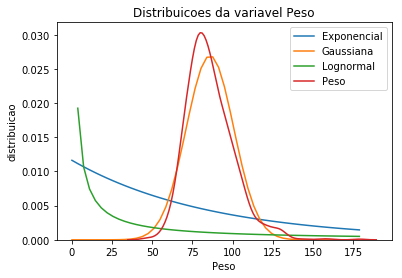




Carga Final 

Lambda da exponencial:  0.005804790636258545 

Mu da gaussiana:  172.27150170648466
Sigma ao quadrado da gaussiana:  4913.0459847625925 

Mu da lognormal:  5.0546544058509895
Sigma ao quadrado da lognormal:  25.40494479601548 



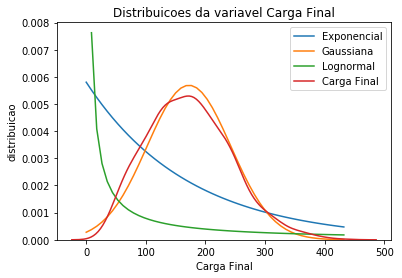




VO2 maximo 

Lambda da exponencial:  0.03401970593551017 

Mu da gaussiana:  29.39472792315316
Sigma ao quadrado da gaussiana:  110.1922553250324 

Mu da lognormal:  3.3132400746591215
Sigma ao quadrado da lognormal:  10.25653779648369 



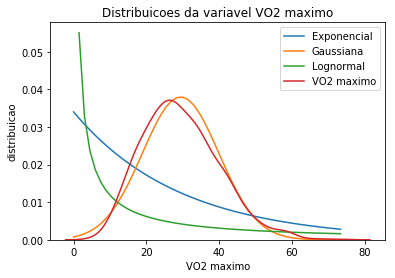

In [37]:
for i in range(0,4):
    x= Data.columns[i]
    intervalo = np.linspace(0,Data[x].max())
    print(x, "\n")
    
    #Exponencial
    exponencial_lambda = 1/Data[x].mean()
    exponencial= exponencial_lambda* np.exp(-(exponencial_lambda*intervalo))
    plt.plot(intervalo,exponencial, label ="Exponencial")
    print("Lambda da exponencial: ", exponencial_lambda, "\n")
    
    #gaussiana
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    gaussiana =(1/(np.sqrt(2*np.pi*gaussiana_sigma2)))* np.exp((-1/2)*((intervalo-gaussiana_mu)**2)/gaussiana_sigma2)
    plt.plot(intervalo, gaussiana, label="Gaussiana")
    print("Mu da gaussiana: ", gaussiana_mu)
    print("Sigma ao quadrado da gaussiana: ", gaussiana_sigma2, "\n")
    
    #lognormal

    lognormal_mu= np.sum(np.log(Data[x]))/Data[x].count()
    lognormal_sigma2= np.sum((np.log(Data[x]-lognormal_mu)**2))/Data[x].count()
    lognormal= (1/(np.sqrt(2*np.pi*lognormal_sigma2)*intervalo))* np.exp((-1/2)*((np.log(intervalo)-lognormal_mu)**2)/lognormal_sigma2)
    plt.plot(intervalo, lognormal, label="Lognormal")
    print("Mu da lognormal: ", lognormal_mu)
    print("Sigma ao quadrado da lognormal: ", lognormal_sigma2, "\n")
                             
    #weibull
    
    
    #empirica
    sns.kdeplot(Data[x])
    
    plt.title('Distribuicoes da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicoes da variavel '+x)
    plt.show()
    print("\n\n")
    

Idade 



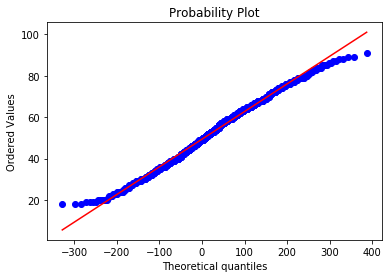

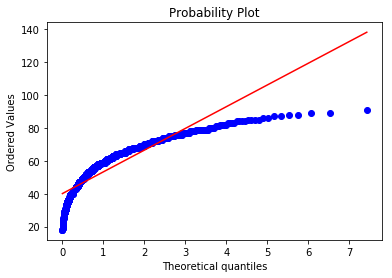

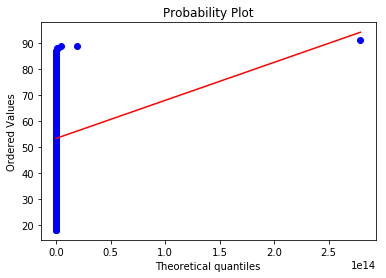

Peso 



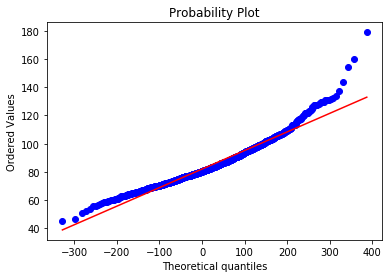

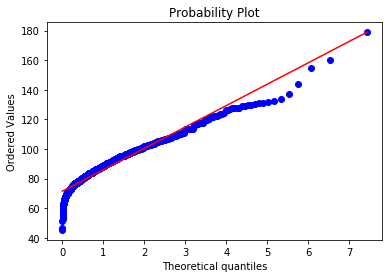

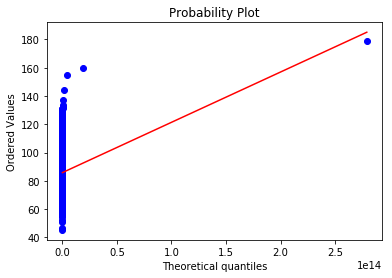

Carga Final 



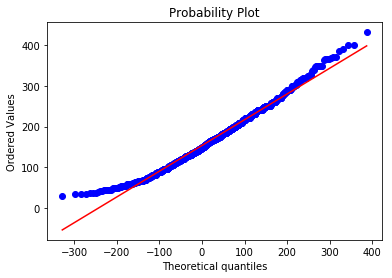

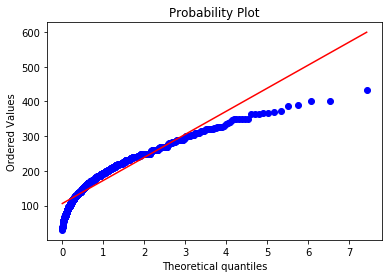

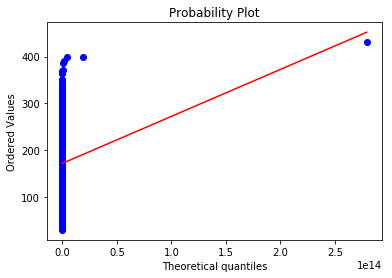

VO2 maximo 



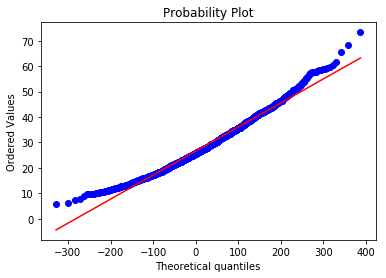

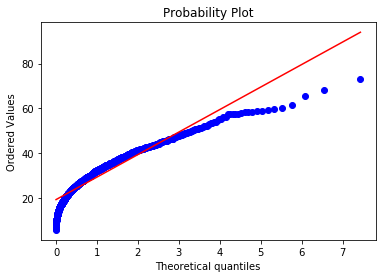

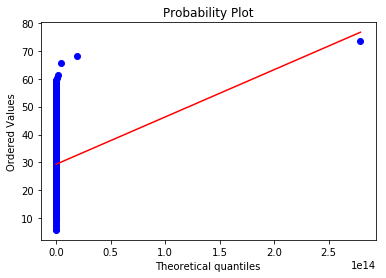

In [49]:
from scipy.stats import expon
for i in range(0,4):
    x= Data.columns[i]
    print(x, "\n")
    
    stats.probplot(Data[x], dist='norm', sparams=(gaussiana_mu,gaussiana_sigma2),plot=plt)
    plt.show()
    stats.probplot(Data[x], dist='expon',plot=plt)
    plt.show()
    stats.probplot(Data[x], dist='lognorm',sparams=(lognormal_sigma2),plot=plt)
    plt.show()
    
    

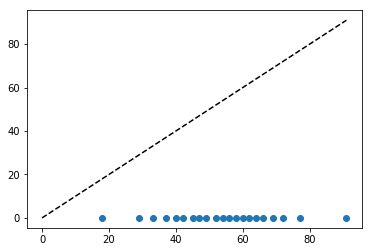

KeyError: '[3.40206233e-03 1.86047549e+00 3.71754892e+00 5.57462234e+00\n 7.43169577e+00 9.28876920e+00 1.11458426e+01 1.30029161e+01\n 1.48599895e+01 1.67170629e+01 1.85741363e+01 2.04312098e+01\n 2.22882832e+01 2.41453566e+01 2.60024300e+01 2.78595035e+01\n 2.97165769e+01 3.15736503e+01 3.34307238e+01 3.52877972e+01\n 3.71448706e+01 3.90019440e+01 4.08590175e+01 4.27160909e+01\n 4.45731643e+01 4.64302377e+01 4.82873112e+01 5.01443846e+01\n 5.20014580e+01 5.38585315e+01 5.57156049e+01 5.75726783e+01\n 5.94297517e+01 6.12868252e+01 6.31438986e+01 6.50009720e+01\n 6.68580454e+01 6.87151189e+01 7.05721923e+01 7.24292657e+01\n 7.42863392e+01 7.61434126e+01 7.80004860e+01 7.98575594e+01\n 8.17146329e+01 8.35717063e+01 8.54287797e+01 8.72858531e+01\n 8.91429266e+01 9.10000000e+01] not in index'

In [60]:
for i in range(0,4):
    x= Data.columns[i]
    percs = np.linspace(0,100,21)
    intervalo = np.linspace(0,Data[x].max())
    qn_a=np.percentile(Data[x],percs)
    
    #Exponencial
    exponencial_lambda = 1/Data[x].mean()
    exponencial= exponencial_lambda* np.exp(-(exponencial_lambda*intervalo))

    qn_b=np.percentile(exponencial,percs)
    plt.plot(qn_a,qn_b, ls="", marker="o")
    x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
    plt.plot(x,x, color="k", ls="--")
    plt.show()
    
    #Gaussiana
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    gaussiana =(1/(np.sqrt(2*np.pi*gaussiana_sigma2)))* np.exp((-1/2)*((intervalo-gaussiana_mu)**2)/gaussiana_sigma2)
    
    qn_c= np.percentile(gaussiana,percs)
    plt.plot(qn_a,qn_c, ls="", marker="o")
    x = np.linspace(np.min((qn_a.min(),qn_c.min())), np.max((qn_a.max(),qn_c.max())))
    plt.plot(x,x, color="k", ls="--")
    plt.show()
    

Coeficiente de correlação entre  Idade  e VO2 maximo:  -0.6300720192503418


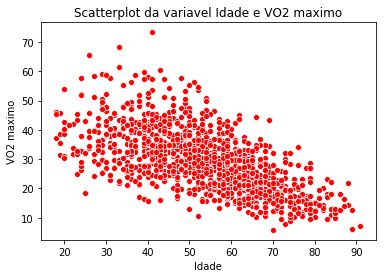




Coeficiente de correlação entre  Peso  e VO2 maximo:  -0.17440061829630799


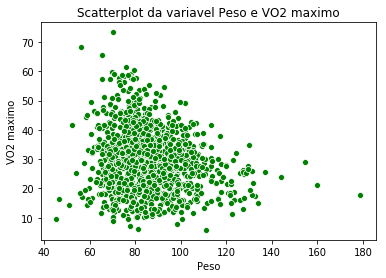




Coeficiente de correlação entre  Carga Final  e VO2 maximo:  0.8783256094059619


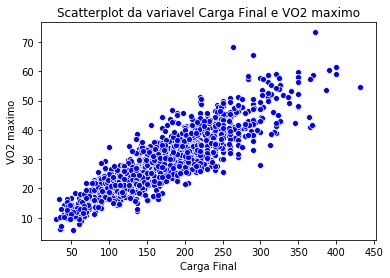

In [176]:
for i in range(0,3):
    x= Data.columns[i]
    Color_scatter =["Red", "Green", "Blue"]
    
    r=(np.sum((Data[x]-Data[x].mean())*(Data["VO2 maximo"]-Data["VO2 maximo"].mean())))/(np.sqrt(np.sum((Data[x]-Data[x].mean())**2))*np.sqrt(np.sum((Data["VO2 maximo"]-Data["VO2 maximo"].mean())**2)))
    print("Coeficiente de correlação entre ",x, " e VO2 maximo: ", r)
    sns.scatterplot(x=Data[x], y=Data["VO2 maximo"], color=Color_scatter[i])
    plt.title('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.savefig('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.show()
    print("\n\n")